# Artificial Neural Networks
## Seoul AI Meetup, June 25
Martin Kersner, <m.kersner@gmail.com>

Inspired by http://neuralnetworksanddeeplearning.com/ and https://github.com/mnielsen/neural-networks-and-deep-learning/blob/master/src/network.py.

* Perceptron
* Multilayer perceptron
* Backpropagation
* Forward pass
    * Activation functions
* Backward pass
    * Stochastic Gradient Descent
    * Weights update
* MNIST
* Keras

In [1]:
from __future__ import division
import random
import numpy as np
from utils import *
import matplotlib.pyplot as plt

%matplotlib inline

## Perceptron

<img src="https://raw.githubusercontent.com/martinkersner/ann-meetup/master/files/perceptron.png" />

In [2]:
# PERCEPTRON - MATRIX MULTIPLICATION EXAMPLE

# weights
# w_1 = 1
# w_2 = 1.1
# w_3 = 0.1
# w_4 = 0.2
W = np.matrix([[1.0, 1.1, 0.1, 0.2]])

# input data
# x_1 = 0.5
# x_2 = 0.7
# x_3 = 3
# x_4 = 1.0
X = np.matrix([[0.5],
               [0.7],
               [3],
               [1.0]])

# bias
b = 1

# forward pass
z = np.dot(W, X) + b
print(z)

# Activation function
# a = activation_function(z)

[[ 2.77]]


## Multilayer perceptron

<img src="https://raw.githubusercontent.com/martinkersner/ann-meetup/master/files/multi-layer-perceptron.png" />

In [3]:
# MULTILAYER PERCEPTRON - MATRIX MULTIPLICATION EXAMPLE

# weights
# w_11 = 1.0
# w_12 = 1.1
# w_13 = 1.3
# w_21 = 0.1
# w_22 = 0.2
# w_23 = 0.6
# w_31 = 0.4
# w_32 = 1.2
# w_32 = 1.9
W = np.matrix([[1.0, 1.1, 1.3], 
               [0.1, 0.2, 0.6],
               [0.4, 1.2, 1.9]])

# input data
# x_1 = 0.5
# x_2 = 0.7
# x_3 = 0.6
X = np.matrix([[0.5],
               [0.7],
               [0.6]])

# biases
b = np.matrix([[1.0],
               [1.0],
               [1.0]])


# forward pass
z = np.dot(W, X) + b
print(z)

# Activation function
# a = activation_function(z)

[[ 3.05]
 [ 1.55]
 [ 3.18]]


## Bias and weight initialization

http://cs231n.github.io/neural-networks-2/#init

In [4]:
# The biases and weights for the network are initialized randomly, using a Gaussian distribution
# with mean 0, and variance 1.
def init_biases(layers, seed=None):
    if seed:
        np.random.seed(seed)

    return [np.random.randn(y, 1) for y in layers[1:]]
    
def init_weights(layers, seed=None):
    if seed:
        np.random.seed(seed)

    return [np.random.randn(y, x) for x, y in zip(layers[:-1], layers[1:])]

# 3-layer neural network
# input layer 10 neurons
# hidden layer 15 neurons
# output layer 7 neurons
layers_tmp = [10, 15, 7]

biases_tmp = init_biases(layers_tmp)
weights_tmp = init_weights(layers_tmp)

In [5]:
# BIASES in layers
for b in biases_tmp:
    print(len(b))

15
7


In [6]:
# BIAS VALUES
print(biases_tmp)

[array([[-0.25737464],
       [ 0.55362573],
       [-0.10221139],
       [-0.59992036],
       [-1.62241036],
       [ 0.43576676],
       [-0.34969519],
       [ 0.56349974],
       [ 1.77925259],
       [-0.66761541],
       [-1.56438705],
       [-1.04157119],
       [ 0.54628843],
       [ 1.51678928],
       [ 0.53417376]]), array([[ 0.2602673 ],
       [-0.47752934],
       [-0.50317898],
       [-0.27892433],
       [-1.75599699],
       [ 1.09356818],
       [ 1.12156592]])]


In [7]:
# WEIGHTS in layers
for w in weights_tmp:
    print(w.shape)

(15, 10)
(7, 15)


In [8]:
# WEIGHTS
print(weights_tmp)

[array([[ 0.167426  , -0.48833111,  0.60435379,  1.34116227, -2.5768881 ,
        -0.30242413, -1.17350664, -0.27993951, -0.46379308, -0.98717482],
       [-0.80974891, -0.92852838, -1.06209342, -0.31140955,  1.29728068,
        -0.21615286,  0.98829445,  0.04929081,  1.02718561, -1.10777653],
       [-0.53353255,  0.79577082,  0.24597882,  1.15107224, -0.70823708,
         0.10123768,  0.88813369, -1.10419784,  2.34624897, -0.83482303],
       [-0.03303552, -1.35379417,  0.22327732, -1.65481561,  1.25992028,
         0.48082545, -0.10499673, -0.13083882,  0.01840625, -0.61046302],
       [-0.72673898,  0.09248858, -0.52800636, -1.10853591, -0.93833256,
         1.22272841, -0.04067013,  0.63642346, -1.27425548,  0.33382191],
       [ 0.05845473,  0.29347716,  1.90696657,  0.79483995,  1.51025489,
         0.42684221,  1.08300445,  1.55563434, -0.17696019, -0.09416082],
       [-0.64925516, -0.87171936,  1.24267575, -1.47232229,  0.40938753,
         0.88414205, -0.6780525 , -0.1124307

## Sigmoid activation function

* Introduces non-linearity
* Saturation problem

<img src="https://raw.githubusercontent.com/martinkersner/ann-meetup/master/files/sigmoid.png" />

Other types of activation functions http://cs231n.github.io/neural-networks-1/#actfun:
* Tanh
* ReLU
* Leaky ReLU
* ELU
* Maxout

In [9]:
def sigmoid(z):
    return 1.0/(1.0+np.exp(-z))

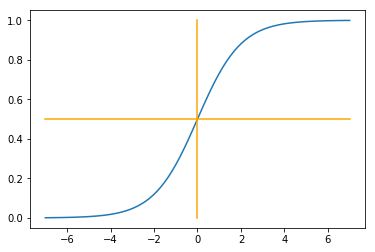

In [10]:
# Sigmoid function plot
x = np.linspace(-7, 7, 80)
plt.plot(x, sigmoid(x))

# center of sigmoid
plt.plot([0,0], [0, 1], c='orange')
plt.plot([-7,7], [0.5, 0.5], c='orange')

## Forward pass

In [11]:
def feedforward(biases, weights, a):
    for b, w in zip(biases, weights):
        a = sigmoid(np.dot(w, a)+b)
        
    return np.argmax(a)

## Backward pass

* Derivative of sigmoid (http://www.ai.mit.edu/courses/6.892/lecture8-html/sld015.htm)

In [12]:
# Take a single training example, forward it through network, computes cost
# and compute gradient of weights and biases for each neuron.
def backprop(biases, weights, x, y):
    # Derivate of sigmoid
    def sigmoid_prime(z):
        return sigmoid(z)*(1-sigmoid(z))
    
    # Derivative of mean squared error
    def cost_derivative(output_activations, y):
        return (output_activations-y)    
    
    # gradients of the cost function for each layer
    nabla_b = zeros_like(biases)
    nabla_w = zeros_like(weights)
    
    # FORWARD PASS
    activation = x
    activations = [x] # list to store all the activations, layer by layer
    zs = [] # list to store all the z vectors, layer by layer
    
    for b, w in zip(biases, weights):
        z = np.dot(w, activation)+b        
        activation = sigmoid(z)
        
        # store all previous z and a vectors
        zs.append(z)
        activations.append(activation)
        
    # BACKWARD PASS
    # the last layer
    loss = cost_derivative(activations[-1], y)
    delta = loss * sigmoid_prime(zs[-1])
#     delta = np.mean(np.square(loss)) * loss * sigmoid_prime(zs[-1])
    nabla_b[-1] = delta
    nabla_w[-1] = np.dot(delta, activations[-2].transpose())
    
    # previous layers
    # going backwards layer by layer
    num_layers = len(weights)+1
    for l in xrange(2, num_layers):
        z = zs[-l]
        sp = sigmoid_prime(z)
        delta = np.dot(weights[-l+1].transpose(), delta) * sp
        
        nabla_b[-l] = delta
        nabla_w[-l] = np.dot(delta, activations[-l-1].transpose())
        
    return (nabla_b, nabla_w, np.mean(np.square(loss)))

## Stochastic Gradient Descent (aka SGD)
* Stochastic
* Gradient
* Descent

<img src="https://raw.githubusercontent.com/martinkersner/ann-meetup/master/files/gradient-descent.png" />

<img src="https://raw.githubusercontent.com/martinkersner/ann-meetup/master/files/sgd-update.png" />

### Learning rate (aka eta)
Learning rate represents size of step during gradient descent.

### Minibatch
Minibatch is randomly selected training inputs of fixed size.

In [13]:
# Update weights.
def update_mini_batch(biases, weights, mini_batch, eta):
    def update(v, nv, eta, mini_batch_size):
        return v-(eta/mini_batch_size)*nv
    
    def cumulate(nabla_v, delta_nabla_v):
        return [nv+dnv for nv, dnv in zip(nabla_v, delta_nabla_v)]
        
    nabla_b = zeros_like(biases)
    nabla_w = zeros_like(weights)
    loss = 0
    
    # Collect weights and bias gradients for each minibatch and sum them
    for x, y in mini_batch:
        delta_nabla_b, delta_nabla_w, loss_tmp = backprop(biases, weights, x, y)
        
        nabla_b = cumulate(nabla_b, delta_nabla_b)
        nabla_w = cumulate(nabla_w, delta_nabla_w)
        loss += loss_tmp
    
    mini_batch_size = len(mini_batch)
    
    weights = [update(w, nw, eta, mini_batch_size)
               for w, nw in zip(weights, nabla_w)]
    
    biases = [update(b, nb, eta, mini_batch_size)
              for b, nb in zip(biases, nabla_b)]
    
    return biases, weights, loss/mini_batch_size

## Training
* **Epoch** full pass through the training set. ([reference](http://ufldl.stanford.edu/tutorial/supervised/OptimizationStochasticGradientDescent/))

In [14]:
def SGD(biases, weights, training_data, epochs, mini_batch_size, eta, test_data=None, seed=None):
    def evaluate(biases, weights, data, training_data_evalution=False):
        if training_data_evalution:
            test_results = [(feedforward(biases, weights, x), np.argmax(y)) for (x, y) in data]
        else:
            test_results = [(feedforward(biases, weights, x), y) for (x, y) in data]

        return sum(int(x == y) for (x, y) in test_results)
    
    if test_data:
        n_test = len(test_data)

    n = len(training_data)
    test_acc_lst = []
    train_acc_lst = []
    loss_lst = []
    
    if not seed:
        np.random.seed(seed)
    
    for j in xrange(epochs):
        random.shuffle(training_data)
        
        mini_batches = [training_data[k:k+mini_batch_size] for k in xrange(0, n, mini_batch_size)]
        loss = 0
        
        for mini_batch in mini_batches:
            biases, weights, loss_tmp = update_mini_batch(biases, weights, mini_batch, eta)
            loss += loss_tmp
            
        loss /= len(mini_batches)
        loss_lst.append(loss)
        
        if test_data:
            test_acc = evaluate(biases, weights, test_data)
            test_acc_lst.append(test_acc/n_test)
            
            train_acc = evaluate(biases, weights, training_data, training_data_evalution=True)
            train_acc_lst.append(train_acc/n)
            
            print("Epoch {0}, acc: {1}, loss: {2}".format(j, test_acc/n_test, loss))
        else:
            print("Epoch {0} complete, loss: {3}".format(j, loss))
            
    return biases, weights, train_acc_lst, test_acc_lst, loss_lst

## MNIST dataset
* http://yann.lecun.com/exdb/mnist/
* 28 by 28 pixels
* grayscale images

In [15]:
import mnist_loader
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()

print("number of training examples: {0:1d}".format(len(training_data)))
print("number of validation examples: {0:1d}".format(len(validation_data)))
print("number of test examples: {0:1d}".format(len(test_data)))

number of training examples: 50000
number of validation examples: 10000
number of test examples: 10000


## Data

7


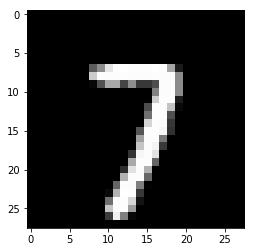

In [16]:
def get_sample(data, idx):
    X_rand = data[idx][0]
    y_rand = data[idx][1]
    
    return X_rand, y_rand

def display_digit(data, idx=None):
    """ If idx parameter is not specified display random data sample. """
    if idx == None:
        idx = random.randint(0, len(data)-1)
    
    X_tmp, y_tmp = get_sample(data, idx)

    img = X_tmp.reshape((28, 28))
    plt.figure()
    plt.imshow(img, cmap='gray')
    
    if isinstance(y_tmp, int):
        print(y_tmp)
    else:
        print(np.argmax(y_tmp))
    
display_digit(training_data)

### One-hot encoding

[[ 0.]
 [ 0.]
 [ 1.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]
2


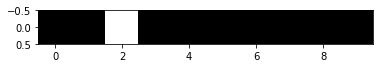

In [17]:
def display_random_one_hot_encoding(data):
    rand_idx = random.randint(0, len(data)-1)    
    _, y_rand = get_sample(data, rand_idx)
    
    print(y_rand)
    plt.figure()
    plt.imshow(y_rand.T, cmap='gray')
    print(np.argmax(y_rand))
    
display_random_one_hot_encoding(training_data)

### Training

In [18]:
# The first layer containing 784 neurons (784 pixels as input), 
# the second layer 30 neurons (arbitrarily chosen),
# and the output layer has 10 neurons (one-hot encoding for 10 different values).
layers = [784, 30, 10]

seed = 6 # seed number to get always the same weights and biases

# randomly initialize weights and biases
biases = init_biases(layers, seed=seed)
weights = init_weights(layers, seed=seed)

# Training hyperparameters
epochs=5
batch_size=10
eta=3.0

# Train
biases_final, weights_final, train_acc, test_acc, loss = SGD(biases, weights, training_data, \
                                                             epochs, batch_size, eta, \
                                                             test_data=validation_data, seed=seed)

# Do not evaluate model after each epoch 
# biases_final, weights_final, _, _, loss = SGD(biases, weights, training_data, \
#                                               epochs, mini_batch_size, eta, \
#                                               seed=seed)

Epoch 0, acc: 0.9091, loss: 0.0273924328503
Epoch 1, acc: 0.9217, loss: 0.0140665967117
Epoch 2, acc: 0.9346, loss: 0.0120367724391
Epoch 3, acc: 0.9381, loss: 0.0108929503366
Epoch 4, acc: 0.9397, loss: 0.0101313110073


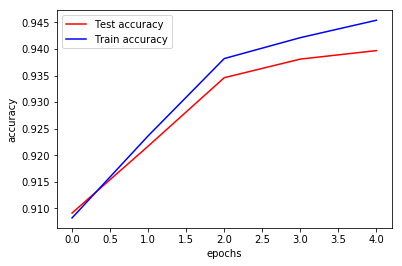

In [19]:
# Plot training curves
plt.plot(range(len(test_acc)),  test_acc,  c="r", label='Test accuracy')
plt.plot(range(len(train_acc)), train_acc, c="b", label='Train accuracy')
plt.legend()
plt.ylabel("accuracy")
plt.xlabel("epochs")

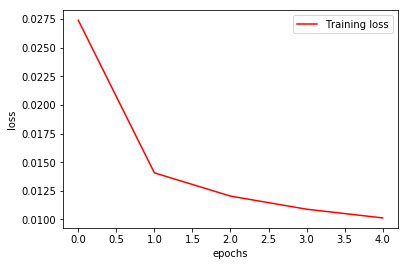

In [20]:
# Plot training loss
plt.plot(range(len(loss)), loss, c="r", label='Training loss')
plt.legend()
plt.ylabel("loss")
plt.xlabel("epochs")

### Evaluation on test dataset

             precision    recall  f1-score   support

          0       0.93      0.99      0.96       980
          1       0.97      0.98      0.98      1135
          2       0.93      0.93      0.93      1032
          3       0.94      0.92      0.93      1010
          4       0.93      0.94      0.94       982
          5       0.92      0.91      0.91       892
          6       0.96      0.95      0.95       958
          7       0.94      0.94      0.94      1028
          8       0.92      0.94      0.93       974
          9       0.94      0.89      0.92      1009

avg / total       0.94      0.94      0.94     10000



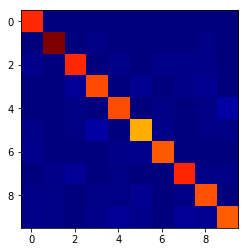

In [21]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

y_pred = []
y_true = []

for test_idx in range(len(test_data)):
    X_test = test_data[test_idx][0]
    y_test = test_data[test_idx][1]
    
    y_true.append(y_test)
    y_pred.append(feedforward(biases_final, weights_final, X_test))

# Confusion matrix
plt.imshow(confusion_matrix(y_true, y_pred), cmap="jet")

# Precision, Recall, F1-score, Support
print(classification_report(y_true, y_pred))

## Keras: The Python Deep Learning library
https://keras.io/

Keras high-level neural networks API, written in Python and capable of running on top of either **TensorFlow**, CNTK or Theano. 

In [22]:
def mnist4keras(data):
    int_type = False
    if isinstance(data[0][1], int):
        int_type = True
        
    X = np.zeros((len(data), 784))
    y = np.zeros((len(data), 10))
    
    for idx, data_tmp in enumerate(data):
        X_tmp, y_tmp = data[idx]
        X[idx] = X_tmp.T
        
        if int_type:
            y[idx][y_tmp] = 1 # create one-hot encoding
        else:
            y[idx] = y_tmp.T
    
    return X, y

### Design network and train model

In [23]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
from keras.initializers import RandomNormal

# Repeatability
np.random.seed(seed) 

# Data preparation
X_train, y_train = mnist4keras(training_data)
X_valid, y_valid = mnist4keras(validation_data)

# Network design
model = Sequential()
model.add(Dense(30, activation='sigmoid', input_dim=784,
               kernel_initializer=RandomNormal(mean=0.0, stddev=1, seed=seed),
               bias_initializer=RandomNormal(mean=0.0, stddev=1, seed=seed)))
model.add(Dense(10, activation='sigmoid',
               kernel_initializer=RandomNormal(mean=0.0, stddev=1, seed=seed),
               bias_initializer=RandomNormal(mean=0.0, stddev=1, seed=seed)))

# Set up training procedure: SGD, loss, metrics
sgd = SGD(lr=eta)
model.compile(loss='mean_squared_error', optimizer=sgd, metrics=['accuracy'])

# Training
model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size)

# Evaluation
score = model.evaluate(X_valid, y_valid, batch_size=batch_size)

print("\n\nResults on validation data")
print("loss: {0:3f}".format(score[0]))
print("accuracy: {0:3f}".format(score[1]))

Using TensorFlow backend.


Epoch 1/5
50000/50000 [==============================] - 8s - loss: 0.0557 - acc: 0.5842     
Epoch 2/5
50000/50000 [==============================] - 8s - loss: 0.0322 - acc: 0.7769     
Epoch 3/5
50000/50000 [==============================] - 8s - loss: 0.0200 - acc: 0.8810     
Epoch 4/5
50000/50000 [==============================] - 8s - loss: 0.0167 - acc: 0.9004     
Epoch 5/5
 9720/10000 [============================>.] - ETA: 0s

Results on validation data
loss: 0.013509
accuracy: 0.919400
